#### Import Necessary Modules

In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Embedding,Bidirectional,LSTM,Conv1D,GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

**This is text document classification dataset which contains 2225 text data and five categories of documents. Five categories are politics, sport, tech, entertainment and business. We can use this dataset for documents classification and document clustering.**

**About Dataset**

Dataset contains two features text and label.



1. No. of Rows : 2225
2. No. of Columns : 2

Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4

In [2]:
df = pd.read_csv('df_file.csv')# load our dataset

In [3]:
class_name = ['Politics',
'Sport',
'Technology',
'Entertainment',
'Business']

In [4]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


#### Stemming and Lemmatize

In [5]:
stemma = PorterStemmer()
lemma = WordNetLemmatizer()
print(lemma.lemmatize('decision'))
print(stemma.stem('decision'))

decision
decis


In [120]:
df.Label.value_counts()

1    511
4    510
0    417
2    401
3    386
Name: Label, dtype: int64

stopwords

In [118]:
from nltk.corpus import stopwords
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

#### Data Cleaning

In [7]:
corpus = [] 
x = df.Text
y = df.Label

for text in x:
    text = re.sub('[^a-zA-Z]', ' ', str(text)).lower()
    sen = re.sub(' +',' ',str(text))
    words = nltk.word_tokenize(sen)
    sen = [stemma.stem(word)for word in words if word not in stopwords.words('english')]
    text = ' '.join(sen)
    corpus.append(text.strip())

In [8]:
corpus[8]

'fox attack blair tori lie toni blair lie took uk war qualm lie elect campaign say tori tori co chairman liam fox speak mr blair told labour member tori offer hard right agenda dr fox told bbc radio will lie reason go war guess go lie anyth would discuss report parti repaid lord ashcroft predict elect defeat prime minist ratchet labour pre elect campaign weekend helicopt tour countri speech parti spring confer insist know poll date wide expect may seen highli person speech gateshead sunday mr blair said passion hunger first walk door down street describ relationship public start euphor struggl live expect reach point rais voic throw crockeri warn support complac say fight futur countri fight britain peopl britain win mr blair said whether public chose michael howard mr kennedi would result tori govern labour govern countri goe back move forward dr fox accus mr blair cabinet minist tell lie oppon polici attack lie learn weekend labour tactic go go fear smear told bbc news tori co chairm

In [10]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

print(f"total words in corpus {total_words}")

total words in corpus 18999


In [117]:
tokenizer.word_index

{'<OOV>': 1,
 'said': 2,
 'year': 3,
 'mr': 4,
 'would': 5,
 'also': 6,
 'peopl': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'time': 11,
 'game': 12,
 'say': 13,
 'use': 14,
 'could': 15,
 'make': 16,
 'last': 17,
 'first': 18,
 'two': 19,
 'like': 20,
 'govern': 21,
 'go': 22,
 'world': 23,
 'play': 24,
 'get': 25,
 'take': 26,
 'film': 27,
 'uk': 28,
 'compani': 29,
 'work': 30,
 'back': 31,
 'show': 32,
 'firm': 33,
 'best': 34,
 'want': 35,
 'bn': 36,
 'win': 37,
 'music': 38,
 'market': 39,
 'told': 40,
 'number': 41,
 'plan': 42,
 'month': 43,
 'servic': 44,
 'set': 45,
 'made': 46,
 'includ': 47,
 'come': 48,
 'ad': 49,
 'way': 50,
 'report': 51,
 'countri': 52,
 'player': 53,
 'mani': 54,
 'three': 55,
 'elect': 56,
 'labour': 57,
 'week': 58,
 'parti': 59,
 'need': 60,
 'look': 61,
 'well': 62,
 'next': 63,
 'expect': 64,
 'bbc': 65,
 'call': 66,
 'home': 67,
 'day': 68,
 'minist': 69,
 'sale': 70,
 'nation': 71,
 'good': 72,
 'think': 73,
 'second': 74,
 'technolog': 75,
 'million'

In [11]:
text_sequence = tokenizer.texts_to_sequences(corpus)

In [13]:
text_sequence[0][:4]

[347, 45, 1249, 56]

In [14]:
max_len = max([len(sen) for sen in text_sequence])
text_padded = pad_sequences(text_sequence,maxlen=max_len,padding='post')

In [16]:
text_padded

array([[ 347,   45, 1249, ...,    0,    0,    0],
       [2537,  157, 2666, ...,    0,    0,    0],
       [ 245,  467, 1645, ...,    0,    0,    0],
       ...,
       [ 634,  697, 1041, ...,    0,    0,    0],
       [ 103, 1106,  121, ...,    0,    0,    0],
       [   9,  236, 1660, ...,    0,    0,    0]])

#### Split Our Data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(text_padded,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape,y_test.shape

((1780, 2198), (445,))

In [19]:
len(x_train),len(y_train),len(x_test),len(y_test)

(1780, 1780, 445, 445)

#### Model Building

In [22]:
model = tf.keras.models.Sequential([
    Embedding(total_words,200,input_length=max_len),
    Bidirectional(LSTM(100,return_sequences=True)),
    Bidirectional(LSTM(50)),
    Dense(5,activation='softmax')
])

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2198, 200)         3799800   
                                                                 
 bidirectional (Bidirection  (None, 2198, 200)         240800    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               100400    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 4141505 (15.80 MB)
Trainable params: 4141505 (15.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['acc'])

callback = tf.keras.callbacks.EarlyStopping(monitor='acc',patience=2)

In [24]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callback],epochs=4)

Epoch 1/4
56/56 [==============================] - 1976s 35s/step - loss: 1.0743 - acc: 0.5725 - val_loss: 0.4996 - val_acc: 0.8472
Epoch 2/4
56/56 [==============================] - 2934s 53s/step - loss: 0.2729 - acc: 0.9348 - val_loss: 0.3071 - val_acc: 0.9303
Epoch 3/4
56/56 [==============================] - 3633s 65s/step - loss: 0.0976 - acc: 0.9837 - val_loss: 0.1960 - val_acc: 0.9528
Epoch 4/4
56/56 [==============================] - 3465s 62s/step - loss: 0.0500 - acc: 0.9921 - val_loss: 0.2216 - val_acc: 0.9371


In [25]:
model.save('document classification model.keras')# Save our Model

In [26]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 78s 6s/step - loss: 0.2216 - acc: 0.9371


[0.22159965336322784, 0.9370786547660828]

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

predicted = model.predict(x_test)
prediction= []
for i in predicted:
    label = np.argmax(i)
    prediction.append(label)

14/14 [==============================] - 72s 5s/step


In [28]:
prediction[:10]

[0, 1, 3, 0, 3, 3, 4, 2, 1, 2]

#### Confusion Matrix

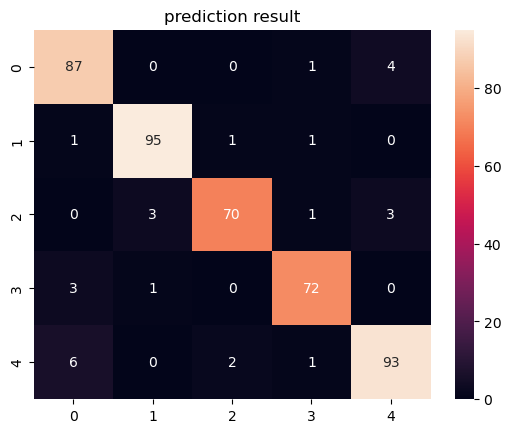

In [30]:
cm = confusion_matrix(y_test,prediction)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
           annot=True,
           fmt='d')
plt.title('prediction result');

#### Classification report

In [32]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        92
           1       0.96      0.97      0.96        98
           2       0.96      0.91      0.93        77
           3       0.95      0.95      0.95        76
           4       0.93      0.91      0.92       102

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445



In [126]:
test_sample = np.array(x_test[10].reshape(1, -1))

### Example Politic Document And Test The Model

In [196]:
text_input = [""""The intricate dance of political ideologies plays out on the world stage, 
as leaders grapple with the challenges of governance. Debates on policy, social justice, and 
the role of government echo through the halls of power. In the pursuit of a better society, 
politicians navigate the complexities of international relations, legislative battles, 
and the ever-evolving demands of their constituents.
"""]

# Same proprocess what we did before
text = re.sub('[^a-zA-Z]', ' ', str(text_input)).lower()
text = re.sub(' +',' ',str(text)).strip()
words = nltk.word_tokenize(text)
sen = [stemma.stem(word)for word in words if word not in stopwords.words('english')]
text = ' '.join(sen)
print(text)

intric danc polit ideolog play world stage na leader grappl challeng govern debat polici social justic nthe role govern echo hall power pursuit better societi npolitician navig complex intern relat legisl battl nand ever evolv demand constitu n


In [197]:
sequence = tokenizer.texts_to_sequences([text])
print(sequence)
embedding_docs = pad_sequences(sequence,padding='post',maxlen=max_len)

[[1, 1309, 244, 6301, 24, 23, 561, 4650, 224, 8171, 485, 21, 799, 340, 943, 1318, 1, 283, 21, 2888, 2280, 192, 5748, 256, 940, 1, 2721, 1826, 165, 1019, 1241, 643, 1, 454, 3978, 304, 1701, 2012]]


In [198]:
class_name[np.argmax(model.predict(embedding_docs))]

1/1 [==============================] - 1s 534ms/step


'Politics'

Wow Finally we Got an Correct answer